In [58]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [59]:
ROOT = os.path.abspath("..")

PATHS = {
    "data": os.path.join(ROOT, "data"),
    "models": os.path.join(ROOT, "models"),
}

DATA = {
    "img00" : os.path.join(PATHS["data"], "car00.webp"),
    "img01" : os.path.join(PATHS["data"], "car01.webp"),
    "img02" : os.path.join(PATHS["data"], "car02.jpg"),
    "img03" : os.path.join(PATHS["data"], "car03.jpg"),
    "img04" : os.path.join(PATHS["data"], "car04.jpg"),
    "video" : os.path.join(PATHS["data"], "video.mp4"),
}

MODEL_PATH = os.path.join(PATHS["models"], "plates_yolov5n.onnx")

In [60]:
model = cv2.dnn.Net = cv2.dnn.readNetFromONNX(MODEL_PATH)
input_shape = 640

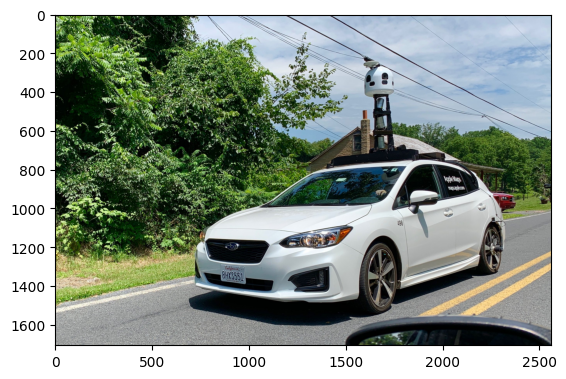

In [61]:
selected_image = DATA["img04"]
img = cv2.imread(selected_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [44]:
img_height, img_width = img.shape[:2]
print(f"Image Size: {img_width} X {img_height}")

Image Size: 2560 X 1707


In [46]:
scale_w = img_width / input_shape
scale_h = img_height / input_shape
print(f"Scale width: {scale_w:.3f}, Scale height: {scale_h:.3f}")

Scale width: 4.000, Scale height: 2.667


In [47]:
blob: np.ndarray = cv2.dnn.blobFromImage(img, 1/255, (input_shape, input_shape), swapRB=False, crop=False)
model.setInput(blob)
predictions: np.ndarray = model.forward()[0]

In [96]:
conf_threshold = 0.5
nms_threshold = 0.2

In [114]:
conf_predictions = predictions[predictions[:, 4] >= conf_threshold]
conf_predictions.shape

[230.77043   504.49954    36.452755   33.930283    0.5762536   0.999977 ]


In [115]:
center_x = conf_predictions[:, 0]
center_y = conf_predictions[:, 1]
width = conf_predictions[:, 2]
height = conf_predictions[:, 3]

conf_predictions[:, 0] = (center_x - width * 0.5)
conf_predictions[:, 1] = (center_y - height * 0.5)
conf_predictions[0]

array([212.54405  , 487.5344   ,  36.452755 ,  33.930283 ,   0.5762536,
         0.999977 ], dtype=float32)

In [116]:
conf_threshold = 0.8
nms_threshold = 0.2
cv2.dnn.NMSBoxes(conf_predictions[:, :4], conf_predictions[:, 4], conf_threshold, nms_threshold)

array([11])